<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
<center><h1>WEATHER ANALYSIS</h1></center>
</div>

![image.jpg](image.jpg)

<h2>About Weather Analysis</h2>

Weather analysis helps in understanding and predicting atmospheric conditions such as temperature, rainfall, humidity, and wind.

It uses historical weather data, real-time observations, and statistical or machine learning models to analyze weather patterns.

Accurate weather analysis helps in planning daily activities, agriculture, disaster management, and improving overall safety and decision-making.

We can get a weather dataset from [Kaggle] (https://www.kaggle.com/datasets/muthuj7/weather-dataset
)

<h2> Understand about Dataset</h2>

Understanding the different features of the weather dataset helps us analyze atmospheric conditions and their impact on daily weather patterns. The dataset consists of several meteorological variables that collectively describe weather behavior. Let us explore what each column represents and how it contributes to weather analysis and prediction.

* **Formatted Date**: Date and time of the recorded weather observation

* **Summary**: A short textual description of the weather conditions (e.g., Clear, Partly Cloudy, Rain)

* **Precip Type**: Type of precipitation observed (Rain, Snow, or None)

* **Temperature (°C)**: Actual air temperature measured in degrees Celsius

* **Apparent Temperature (°C)**: Feels-like temperature perceived by humans, considering wind and humidity

* **Humidity**: Amount of moisture present in the air (values range from 0 to 1)

* **Wind Speed (km/h)**: Speed of the wind at the time of observation

* **Wind Bearing (degrees)**: Direction from which the wind is blowing, measured in degrees

* **Visibility (km)**: Distance up to which objects can be clearly seen

* **Cloud Cover**: Fraction of the sky covered by clouds (values range from 0 to 1)

* **Pressure (millibars)**: Atmospheric pressure at sea level

* **Daily Summary**: A detailed description summarizing the overall weather conditions for the day

Now we have a clear understanding of the factors that influence weather conditions and patterns.

## Let’s dive into EDA first and then move on to weather trend analysis and prediction.


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Import Libraries
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Loading the Dataset
</div>

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Understand about data
</div>

In [3]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
df.shape

(96453, 12)

In [8]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(24)

In [10]:
# lets drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0],inplace=True)

In [12]:
df.dropna(inplace=True)

### Exploratory data analysis

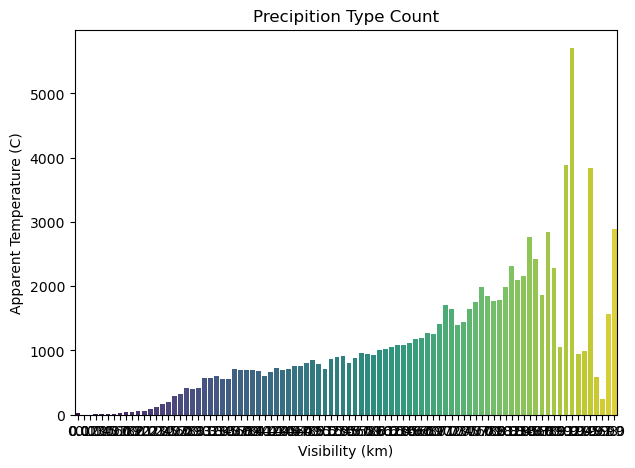

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x='Humidity', data=df, palette='viridis', legend=False)
plt.title("Precipition Type Count")
plt.xlabel("Visibility (km)")
plt.ylabel("Apparent Temperature (C)")
plt.show()

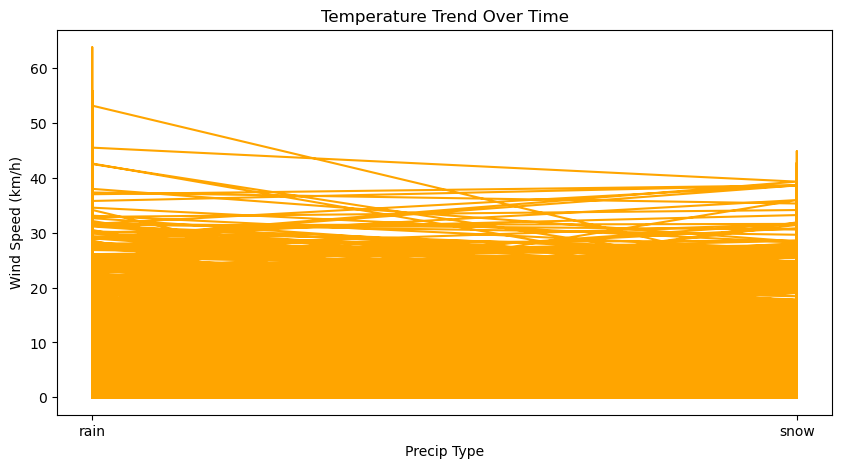

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['Precip Type'], df['Wind Speed (km/h)'], color='orange')
plt.title('Temperature Trend Over Time')
plt.xlabel('Precip Type')
plt.ylabel('Wind Speed (km/h)')
plt.show()

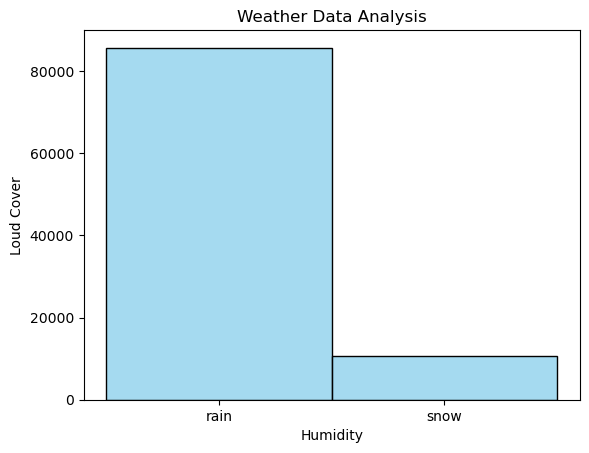

In [15]:
sns.histplot(df['Precip Type'], bins=30,color='skyblue')
plt.title("Weather Data Analysis")
plt.xlabel("Humidity")
plt.ylabel("Loud Cover")
plt.show()

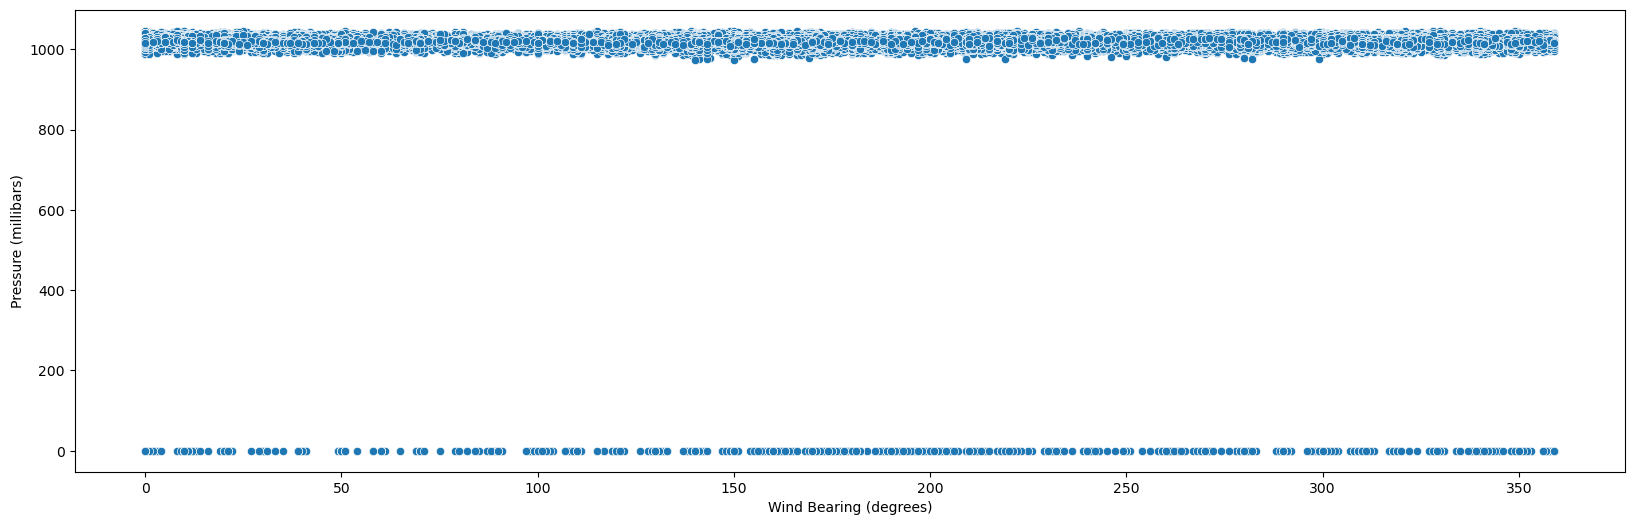

In [16]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Wind Bearing (degrees)",y="Pressure (millibars)",data=df,palette='pastel')
plt.show()

<Axes: xlabel='Humidity', ylabel='count'>

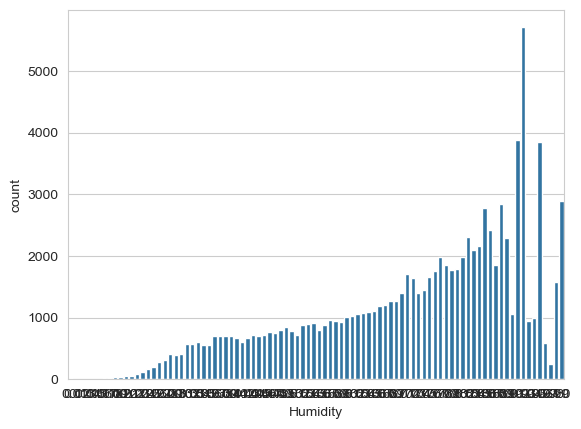

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Humidity',data=df)

In [18]:
df['Precip Type'].value_counts(normalize=True)*100

Precip Type
rain    88.891309
snow    11.108691
Name: proportion, dtype: float64

In [19]:
#numerical features
num_fea = df[['Wind Bearing (degrees)', 'Loud Cover']]
num_fea.head()

,Wind Bearing (degrees),Loud Cover
0,251.0,0.0
1,259.0,0.0
2,204.0,0.0
3,269.0,0.0
4,259.0,0.0


In [20]:
#correlation matrix
num_fea.corr()

,Wind Bearing (degrees),Loud Cover
Wind Bearing (degrees),1.0,NaN
Loud Cover,NaN,NaN


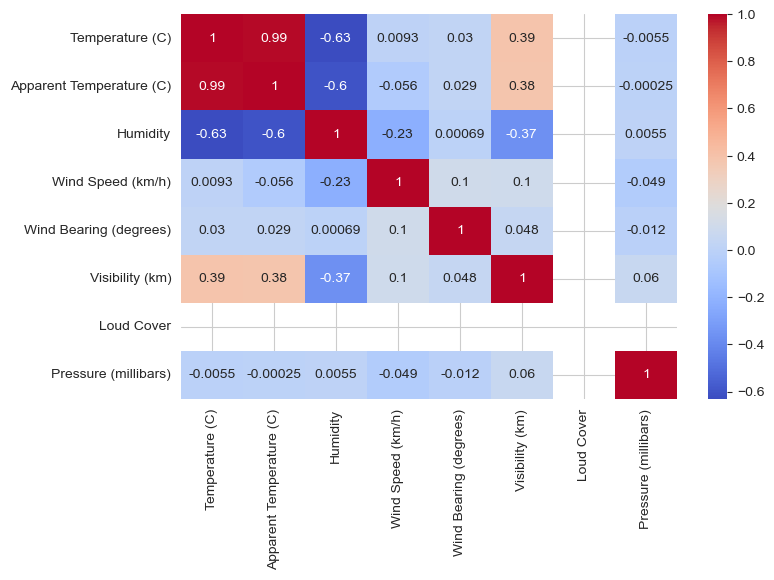

In [21]:
# Correlation heatmap
plt.figure(figsize=(8,5))
df = df.select_dtypes(include=['number'])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
#get dummies on data
df = pd.get_dummies(df, drop_first=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [23]:
#independent and dependent features
x = df.drop('Temperature (C)', axis=1)#independent
y = df['Temperature (C)']#dependent
x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [24]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Feature Scaling: Transform the the continous data (numerical data) <br>onto the same scale of (0,1).
</div>

In [25]:
#apply min max scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [26]:
x.describe()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,0.575123,0.734902,0.169335,0.522277,0.642685,0.0,0.958765
std,0.159492,0.195466,0.108270,0.299099,0.260407,0.0,0.111799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.447767,0.600000,0.091276,0.323120,0.518000,0.0,0.967048
50%,0.592246,0.780000,0.156077,0.501393,0.624000,0.0,0.971397
75%,0.694226,0.890000,0.221382,0.807799,0.920000,0.0,0.975831
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Splitting the required data into training and test dataset.
</div>

In [27]:
from sklearn.model_selection import train_test_split

df.columns = df.columns.str.strip()   # remove hidden spaces

X = df.drop(columns=['Temperature (C)'])
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply LinearRegression.
</div>

In [28]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score
LR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
LR_Accuracy

99

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Decision Tree regression
</div>

In [30]:
# decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

100

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Support Vector Machine-Regression.
</div>

In [ ]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

In [ ]:
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Random forest.
</div>

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [ ]:
RFR_Accuracy = round(r2_score(y_test,model_RFR.predict(X_test))*100)
RFR_Accuracy

100

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Apply Polynomial regression
</div>

In [ ]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

100

In [ ]:
# use polynomial model to predict new input
new_data = pd.DataFrame({
    'Apparent Temperature (C)': [25],
    'Humidity': [30.5],
    'Wind Speed (km/h)': [0],
    'Wind Bearing (degrees)': [0],
    'Visibility (km)': [0],
    'Loud Cover': [2],
    'Pressure (millibars)': [1]
})
#new_data
new_data = poly.transform(new_data)
new_data
poly_model.predict(new_data)

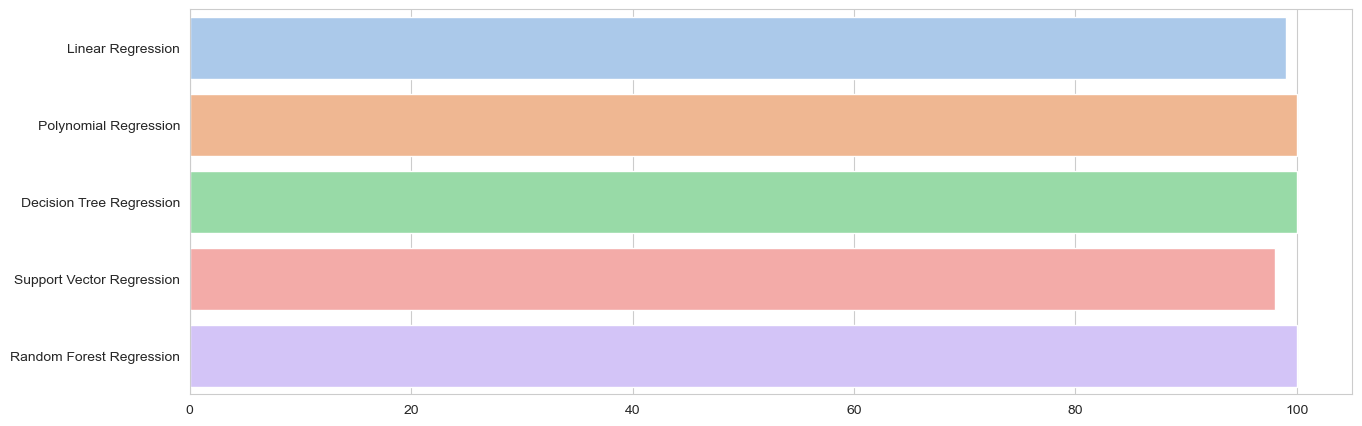

In [ ]:
#accuracy plot
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LR_Accuracy, PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel');

In [ ]:
x.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.523486,0.89,0.221130,0.699164,0.983,0.0,0.970135
1,0.521084,0.86,0.223399,0.721448,0.983,0.0,0.970613
2,0.553144,0.89,0.061523,0.568245,0.929,0.0,0.970909
3,0.501947,0.83,0.220877,0.749304,0.983,0.0,0.971358
4,0.517356,0.83,0.172970,0.721448,0.983,0.0,0.971454


In [ ]:
#predict the user inputs with random forest model
input_data = (19,27.9,2,0,1,0,1)
input_data = np.asarray(input_data)
input_data = scalar.transform(input_data.reshape(1,-1))
predict = model_RFR.predict(input_data)
print(predict)

[0.69211111]


<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Save Decission Tree Model by using Pickel.
</div>

In [ ]:
#save random forest model
import pickle
pickle.dump(model_RFR, open('RF_model.pkl', 'wb'))#wb for binary mode

In [ ]:
#save scalar parameters
pickle.dump(scalar,open('scalar.pkl','wb'))

In [ ]:
import pickle
# Save poly
with open("poly.pkl", "wb") as f:
    pickle.dump(poly, f)

In [ ]:
# save polynomial  model
import pickle
pickle.dump(poly_model, open('poly_model.pkl', 'wb'))

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
<center><h3>Thank You</h3></center>
</div>